<a href="https://colab.research.google.com/github/sreeja-01p/FMML/blob/main/Module_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

```
Coordinator: Aswin Jose
```

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [6]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

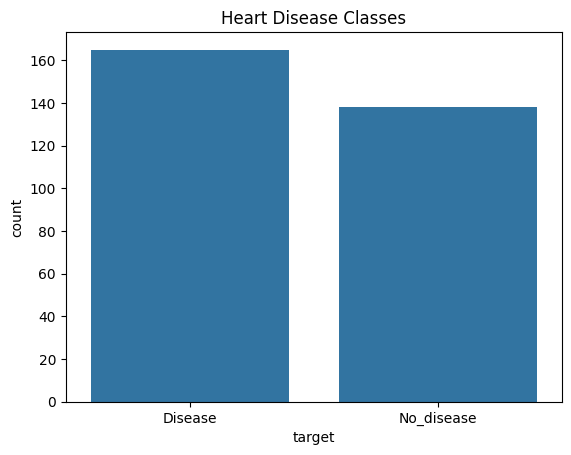

In [8]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

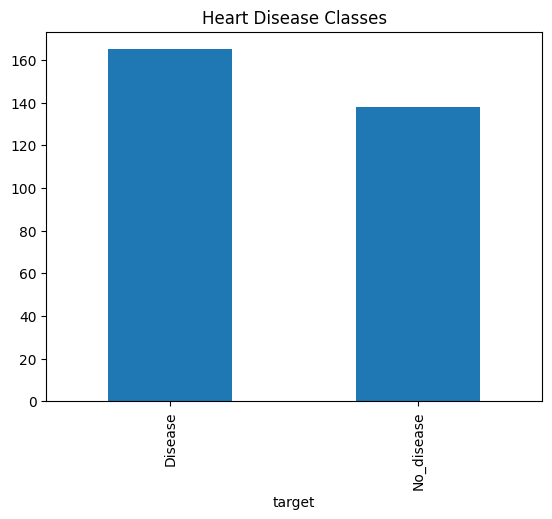

In [9]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

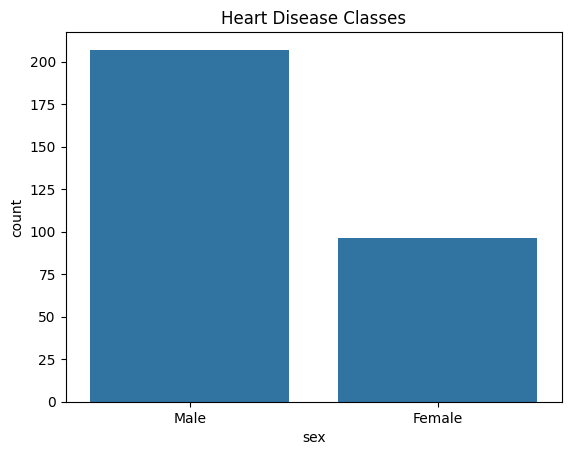

In [ ]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do

**Answer**

<ipython-input-25-e6722775f5f2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=heart_data, palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: title={'center': 'Heart Disease Classes'}, xlabel='sex', ylabel='count'>

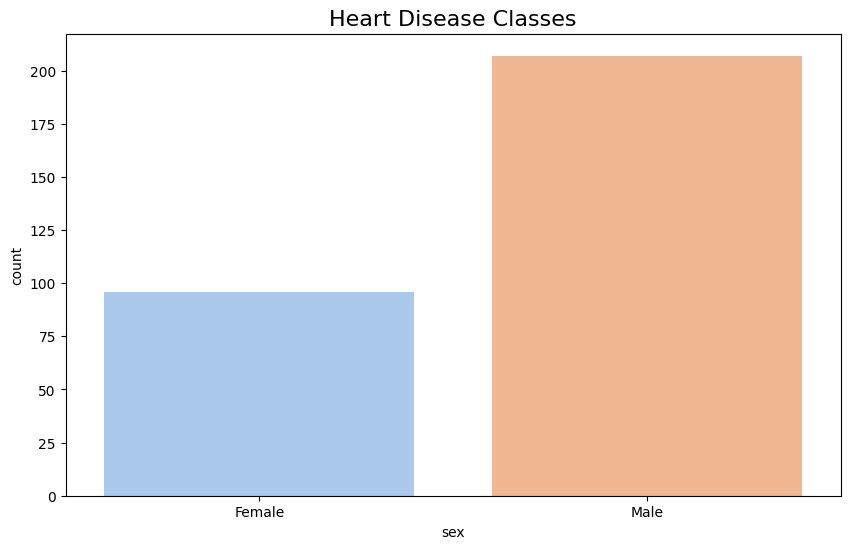

In [25]:
heart_data = pd.read_csv('heart.csv')
plt.figure(figsize=(10, 6))
plt.title('Heart Disease Classes', fontsize=16)
plt.xticks([0, 1], ['Female', 'Male'])
sns.countplot(x='sex', data=heart_data, palette='pastel')

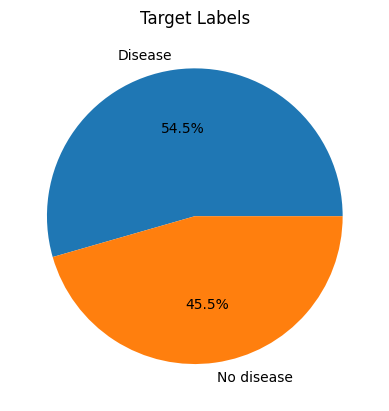

In [13]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

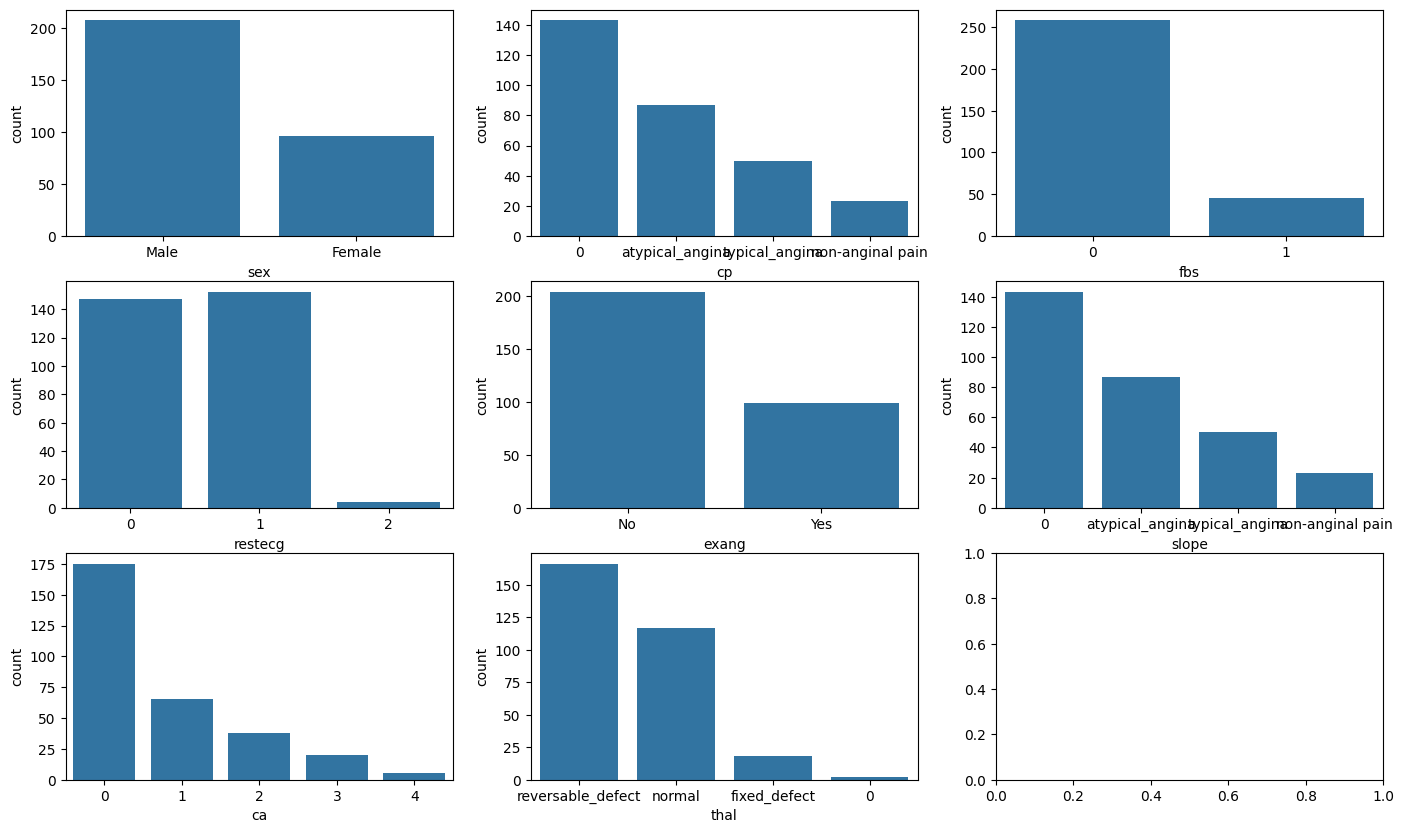

In [14]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Disease classes according to Chest Pain')

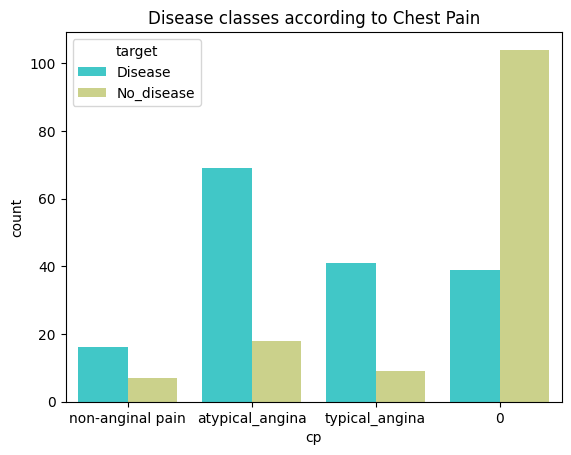

In [15]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

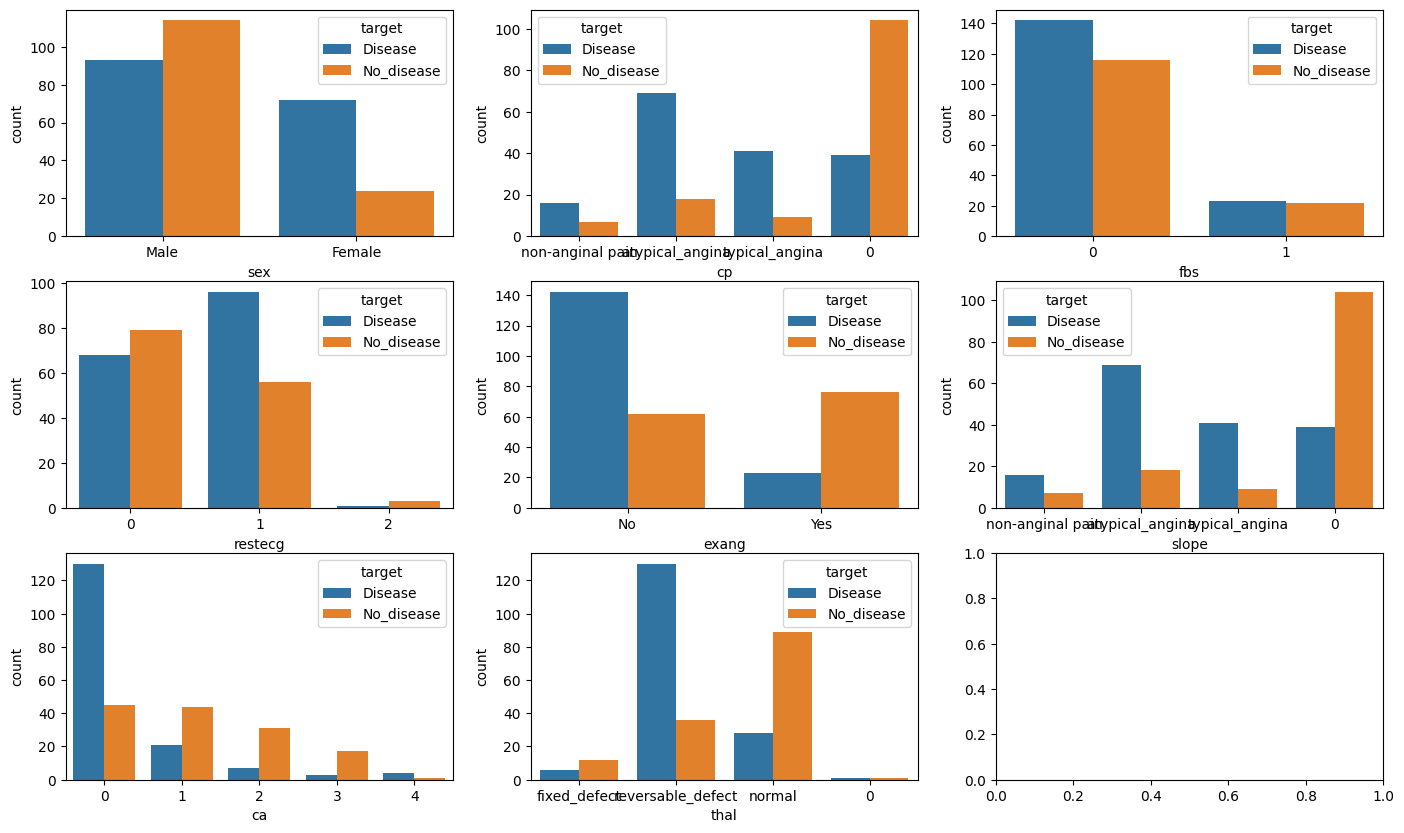

In [ ]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do


**Answer**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

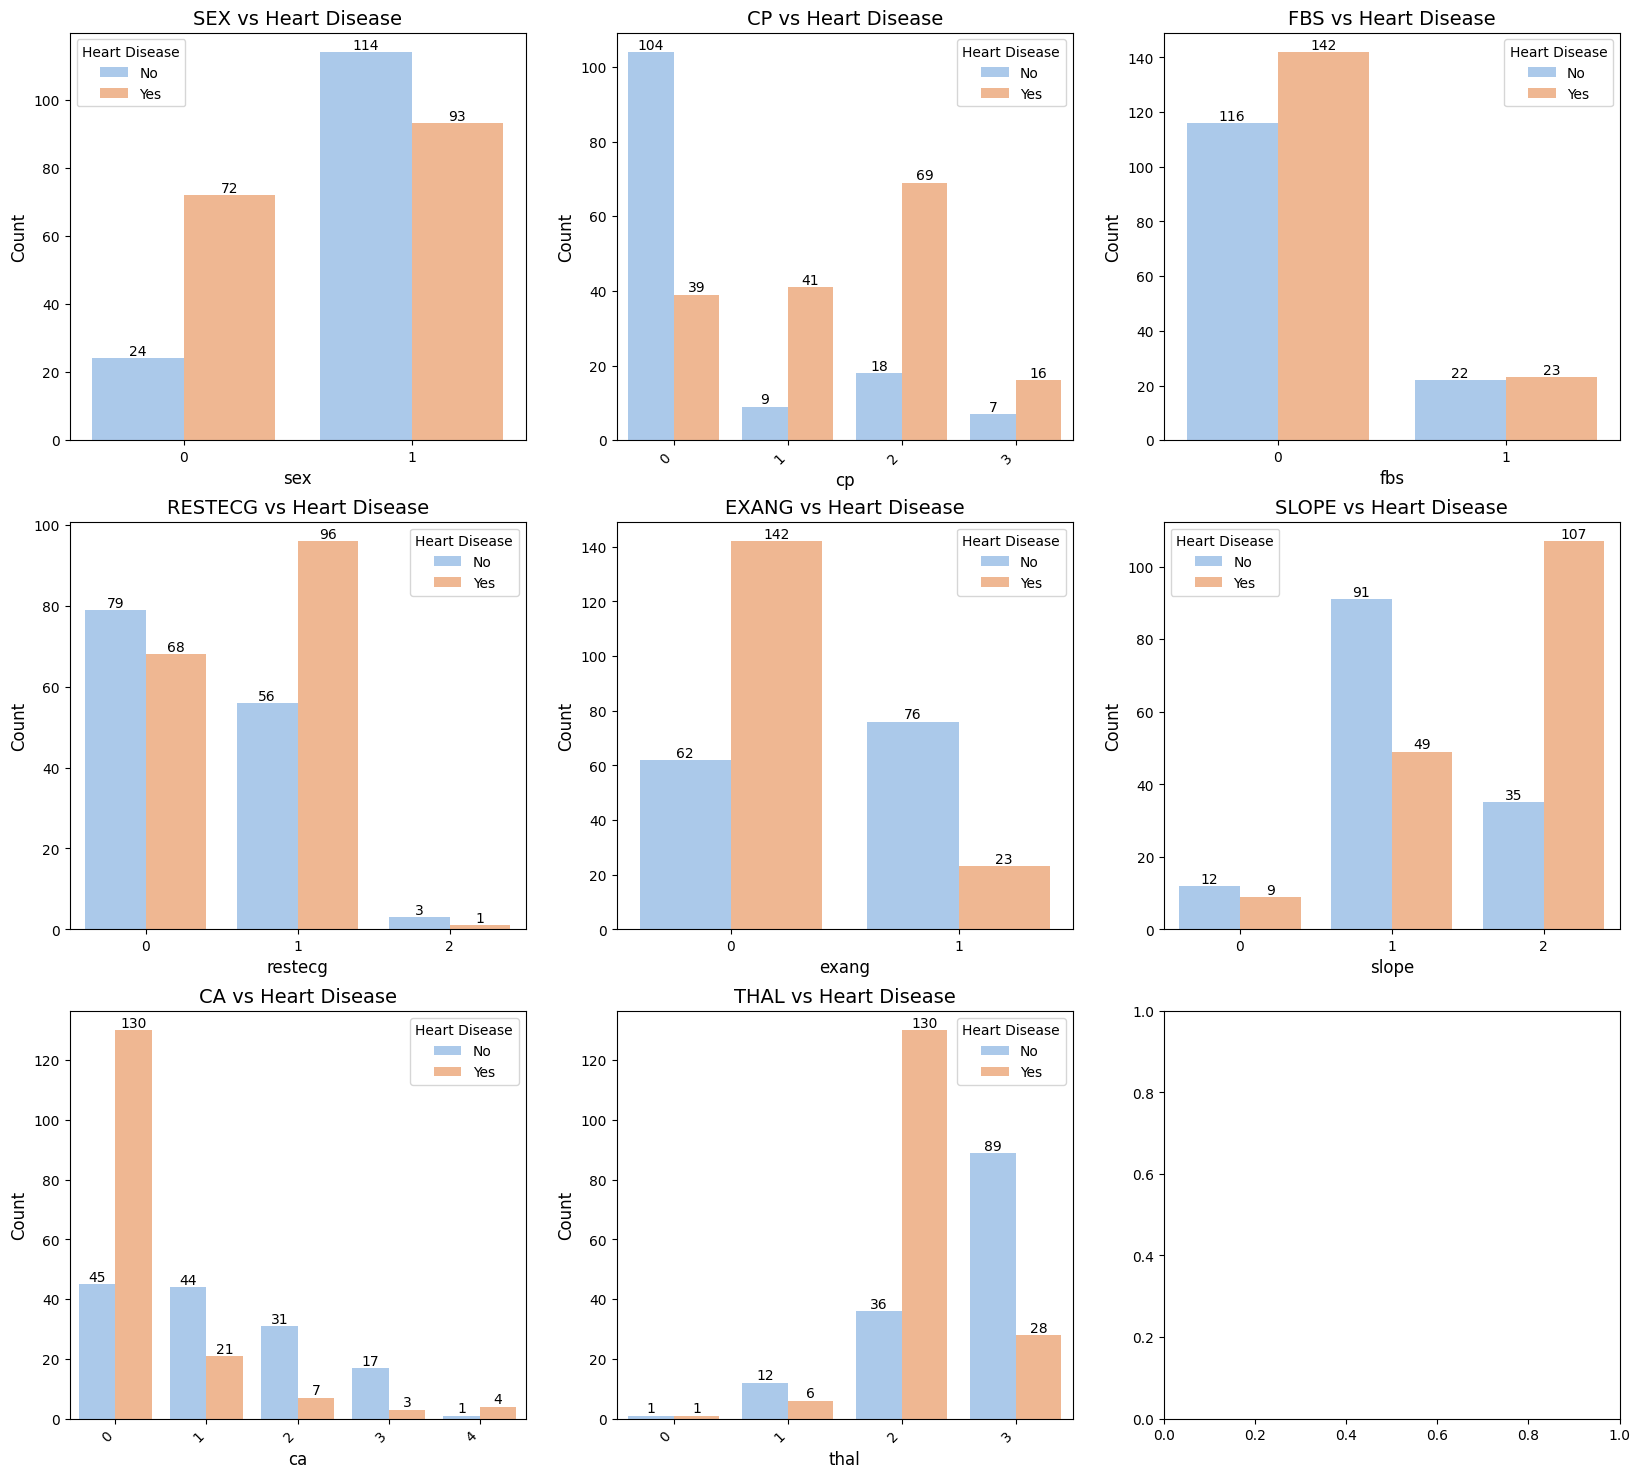

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]

    sns.countplot(x=feature, hue='target', data=heart_data, ax=ax, palette='pastel')

    ax.set_title(f'{feature.upper()} vs Heart Disease', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

    if len(heart_data[feature].unique()) > 3:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    for container in ax.containers:
        ax.bar_label(container, fontsize=10)

    ax.legend(title='Heart Disease', labels=['No', 'Yes'], title_fontsize=10)


In [17]:
plt.tight_layout()
fig.suptitle('Categorical Features vs Heart Disease', fontsize=20, y=1.02)

plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualising the distribution of the continous variables

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

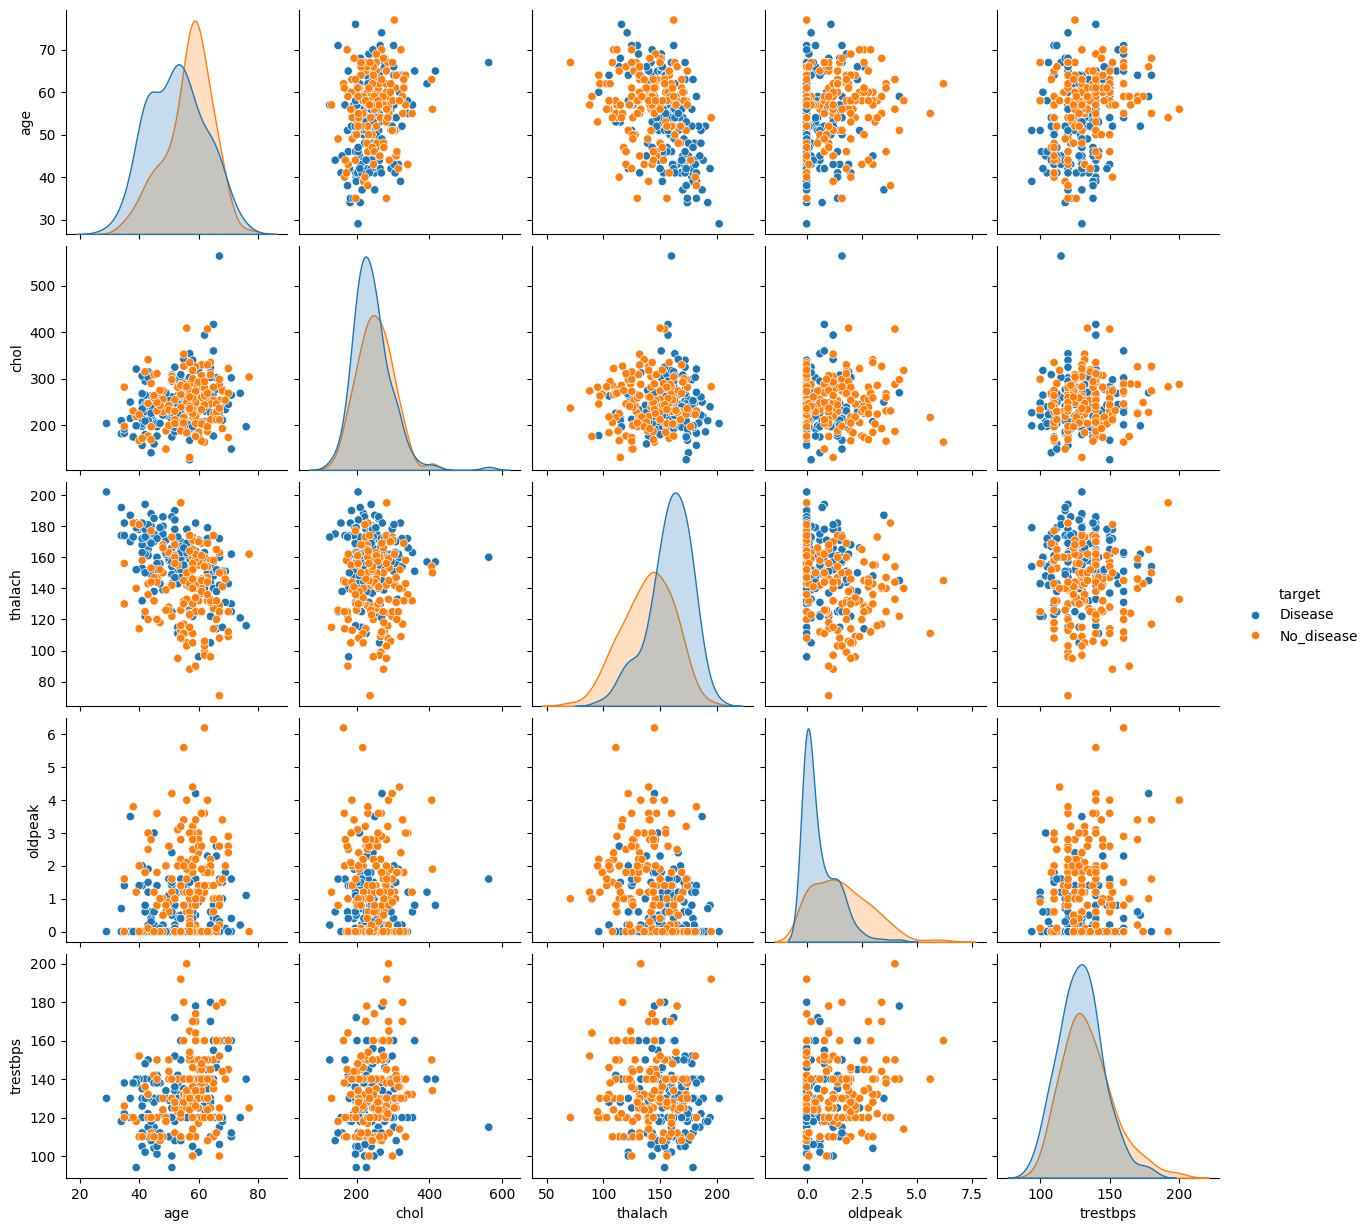

In [18]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

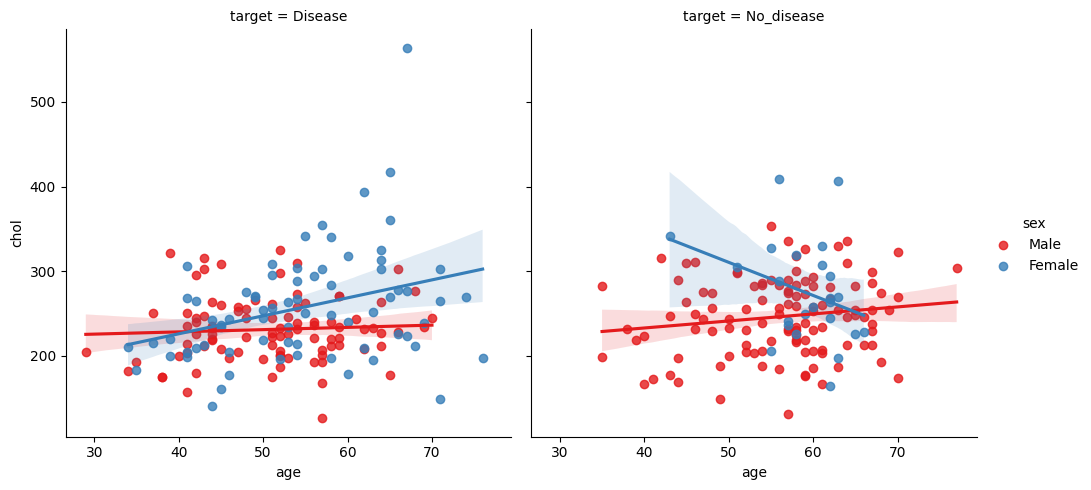

In [19]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

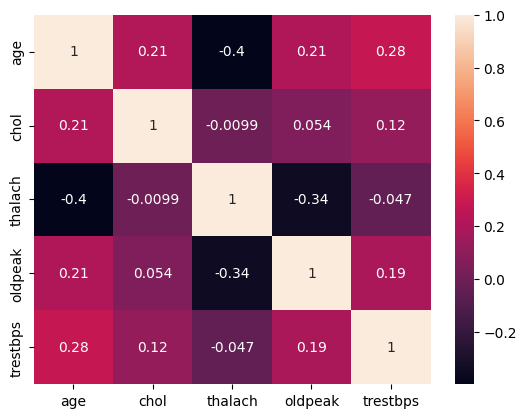

In [20]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

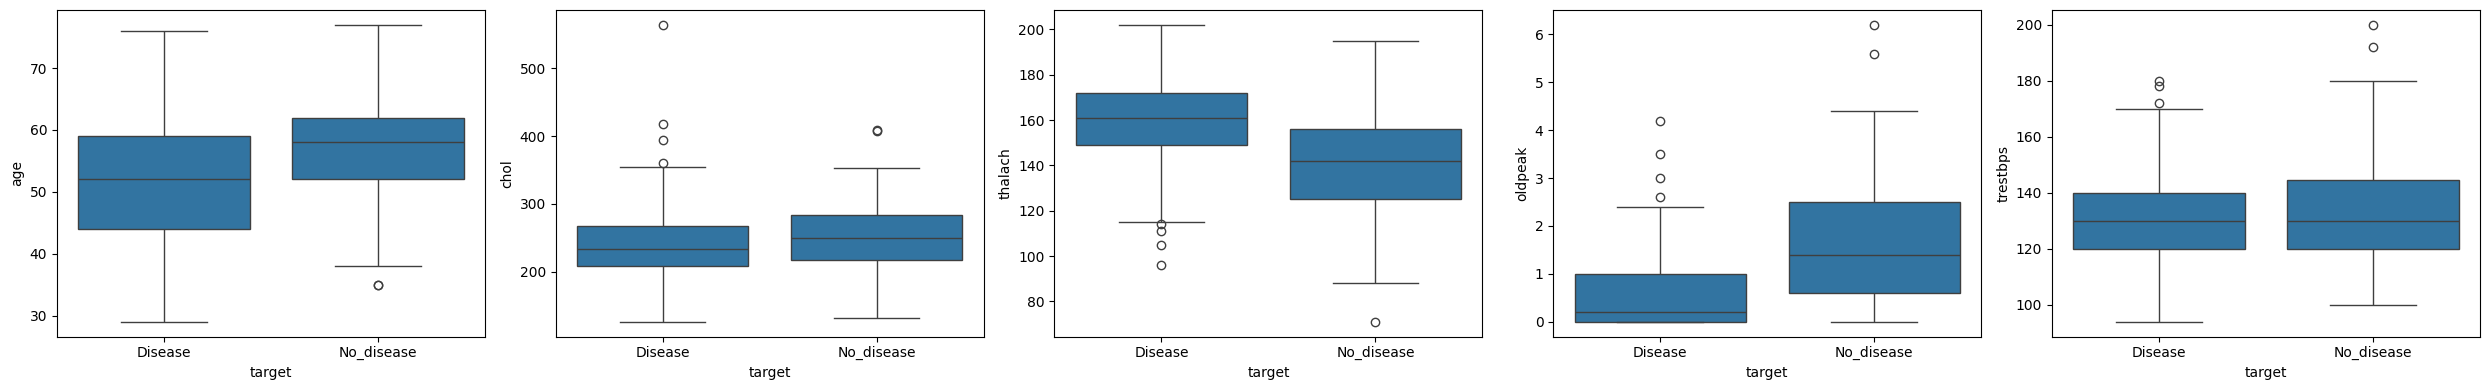

In [21]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

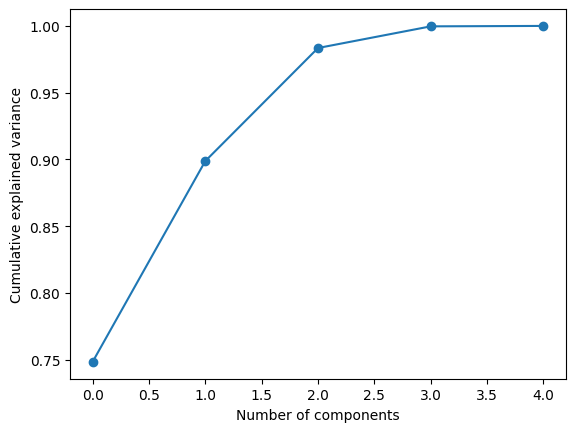

In [ ]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


**Answer**

In [22]:
numeric_columns = heart_data.select_dtypes(include=[np.number]).columns
numeric_data = heart_data[numeric_columns]

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [28]:
pca = PCA()
pca.fit(scaled_data)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

Text(14, 0.85, '95% variance\nreached at 13 components')

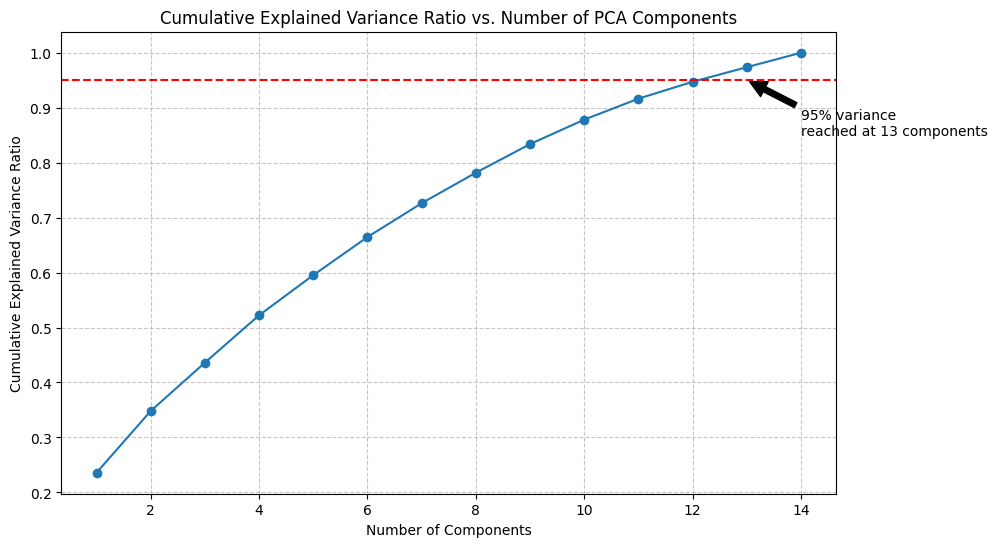

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of PCA Components')

plt.grid(True, linestyle='--', alpha=0.7)

plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')

#no of components needed for 95% variance
n_components_95 = next(i for i, var in enumerate(cumulative_variance_ratio) if var >= 0.95) + 1
plt.annotate(f'95% variance\nreached at {n_components_95} components',
             xy=(n_components_95, 0.95), xytext=(n_components_95+1, 0.85),
             arrowprops=dict(facecolor='black', shrink=0.05))

In [34]:

print(f"Number of components needed to explain 95% of the variance: {n_components_95}")

Number of components needed to explain 95% of the variance: 13


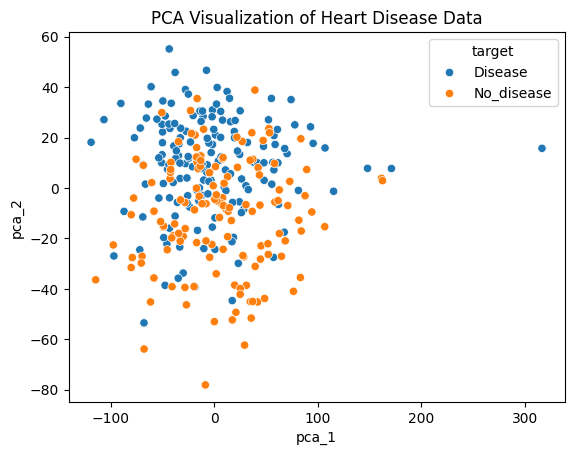

In [31]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


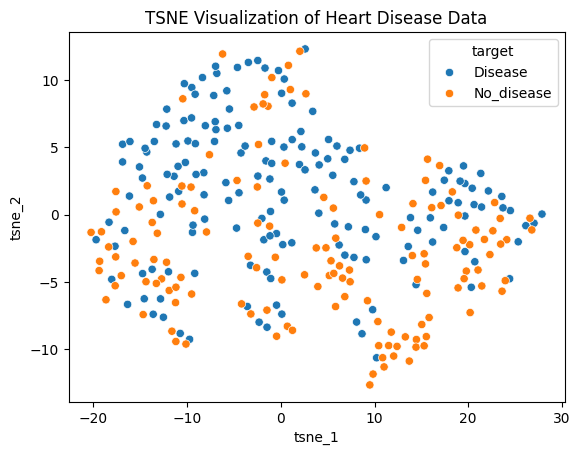

In [35]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

**Answers**

1.
   Approximately 54% of the samples have heart disease.

2.Three continuous features showing significant statistical difference:
   - thalach (maximum heart rate achieved)
   - oldpeak
   - Age
   - chol (serum cholestoral in mg/dl)

3.
There isn't a clear separation between disease and no-disease groups in either the PCA or t-SNE plots. The groups show considerable overlap.

4.
Based on the cumulative explained variance plot, around 8-10 principal components would be optimal to explain about 90-95% of the variance in the data.

5.
   Age and Thalach show a strong negative correlation with each other.

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [36]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [37]:
data = pd.read_csv("star_nutri_expanded.csv")

In [38]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


cleaning and filling the missing values in the data

In [39]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [40]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [41]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [43]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [44]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [45]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [46]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [47]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [48]:

data = data.replace({True: 1, False: 0})


<ipython-input-48-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [49]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-49-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [50]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

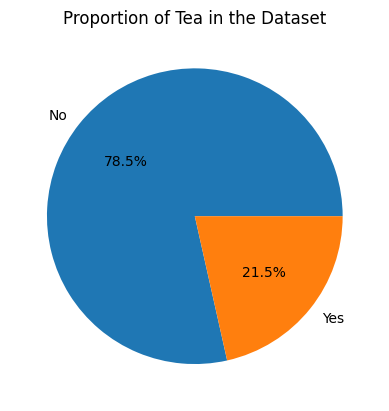

In [ ]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot



**Answer**

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

starbucks_data = pd.read_csv('star_nutri_expanded.csv')

In [54]:
starbucks_data['Tea'] = (starbucks_data['Beverage_category'] == 'Tazo® Tea Drinks').astype(int)

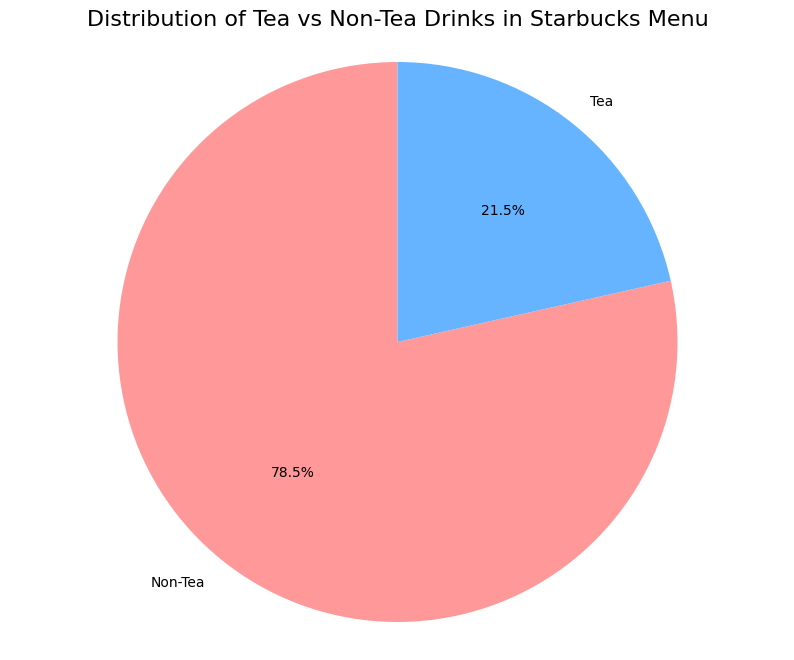

Tea
0    190
1     52
Name: count, dtype: int64


In [55]:
plt.figure(figsize=(10, 8))
tea_counts = starbucks_data['Tea'].value_counts()
plt.pie(tea_counts.values, labels=['Non-Tea', 'Tea'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Tea vs Non-Tea Drinks in Starbucks Menu', fontsize=16)
plt.axis('equal')
plt.show()

print(tea_counts)

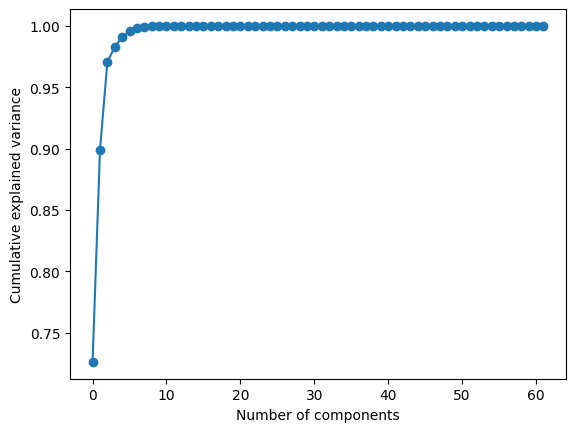

In [ ]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?


**Answer**

In [83]:
numerical_features = ['Calories', 'Total Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)',
                      'Cholesterol (mg)', 'Sodium (mg)', 'Total Carbohydrates (g)',
                      'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)',
                      'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)']

In [60]:
from sklearn.impute import SimpleImputer

In [61]:
X = starbucks_data[numerical_features]
X = X.apply(pd.to_numeric, errors='coerce')

print(X.isnull().sum())
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

Calories                     0
Total Fat (g)                1
Saturated Fat (g)            0
Trans Fat (g)                0
Cholesterol (mg)             0
Sodium (mg)                  0
Total Carbohydrates (g)      0
Dietary Fibre (g)            0
Sugars (g)                   0
Protein (g)                  0
Vitamin A (% DV)           242
Vitamin C (% DV)           242
Calcium (% DV)             242
Iron (% DV)                242
Caffeine (mg)               23
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Vitamin A (% DV)' 'Vitamin C (% DV)' 'Calcium (% DV)' 'Iron (% DV)']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [62]:
pca = PCA()
pca.fit(X_scaled)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

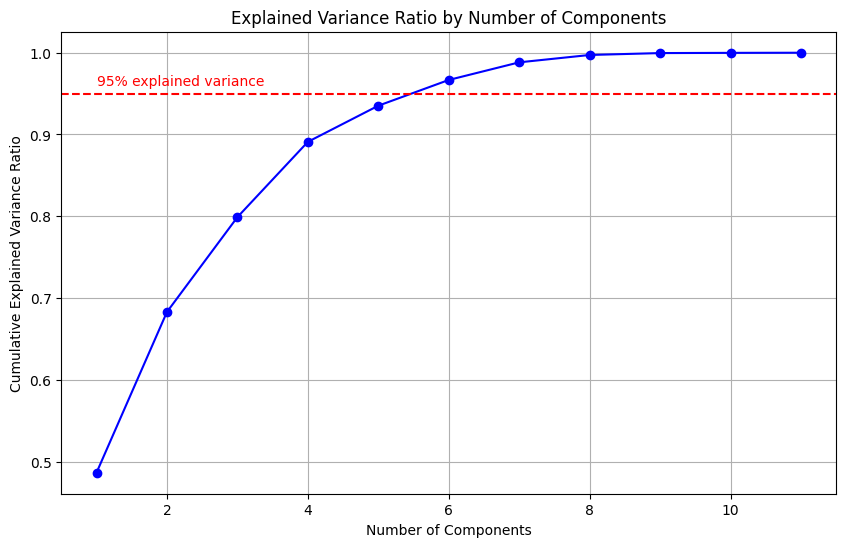

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)

plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(1, 0.96, '95% explained variance', color = 'red', fontsize=10)

plt.show()

In [65]:
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components explaining 95% of variance: {n_components_95}")

#explained variance ratio for each component
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

Number of components explaining 95% of variance: 6
PC1: 0.4863
PC2: 0.1966
PC3: 0.1160
PC4: 0.0921
PC5: 0.0442
PC6: 0.0315
PC7: 0.0216
PC8: 0.0090
PC9: 0.0023
PC10: 0.0003
PC11: 0.0002


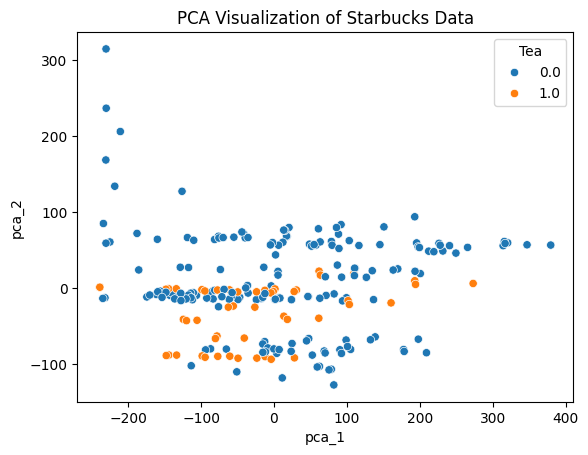

In [ ]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?


**Answer**

In [68]:
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

pca_result = pca.fit_transform(X_scaled)

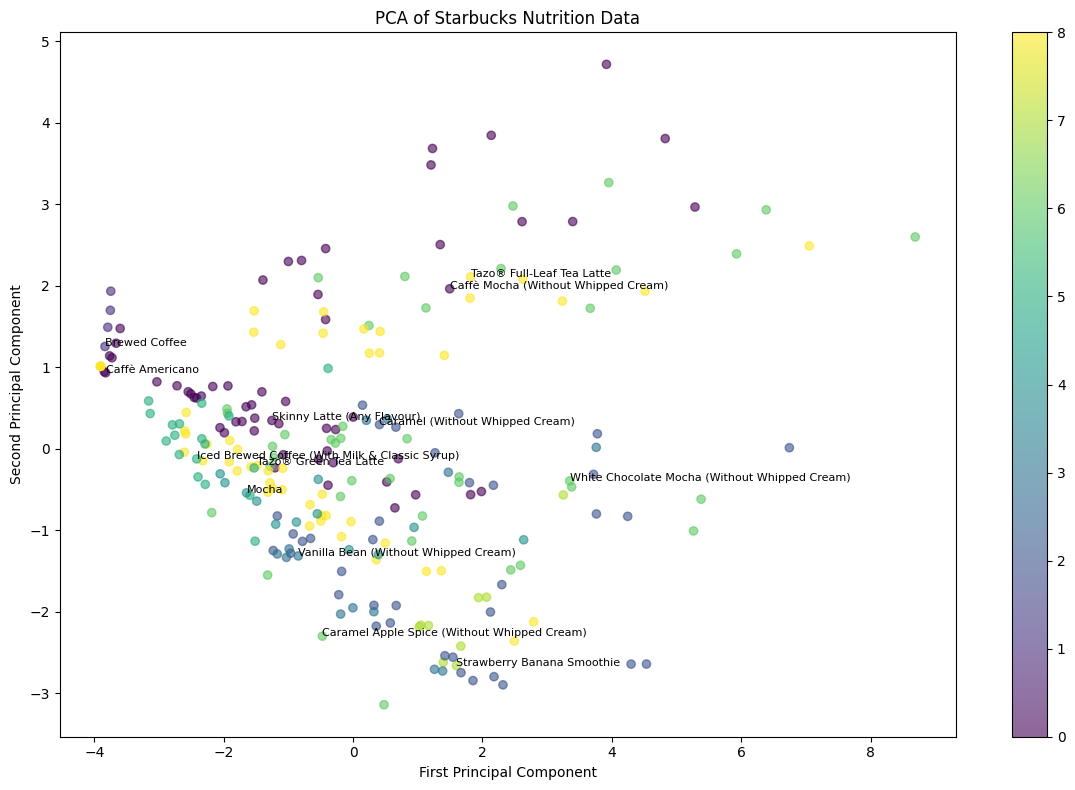

In [71]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                      c=starbucks_data['Beverage_category'].astype('category').cat.codes,
                      cmap='viridis', alpha=0.6)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Starbucks Nutrition Data')

plt.colorbar(scatter)
for i, txt in enumerate(starbucks_data['Beverage']):
    if i % 20 == 0:  # Label every 20th point to avoid overcrowding
        plt.annotate(txt, (pca_result[i, 0], pca_result[i, 1]), fontsize=8)

plt.tight_layout()
plt.show()

In [72]:
print(f"Number of components explaining 95% of variance: {n_components_95}")

#explained variance ratio for each component
for i, ratio in enumerate(pca.explained_variance_ratio_[:n_components_95]):
    print(f"PC{i+1}: {ratio:.4f}")

Number of components explaining 95% of variance: 6
PC1: 0.4863
PC2: 0.1966
PC3: 0.1160
PC4: 0.0921
PC5: 0.0442
PC6: 0.0315


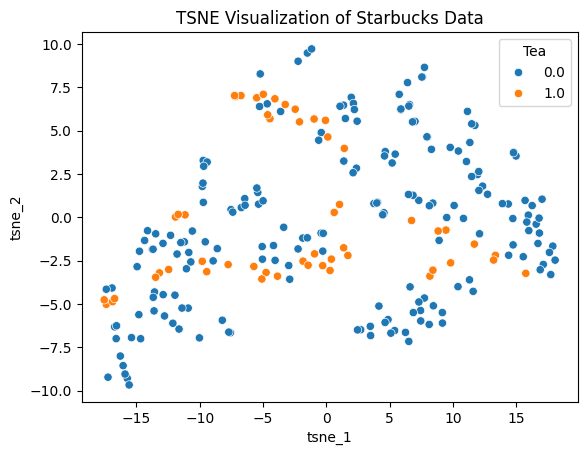

In [ ]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?


**Answer**

In [75]:
X_scaled = scaler.fit_transform(X_imputed)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

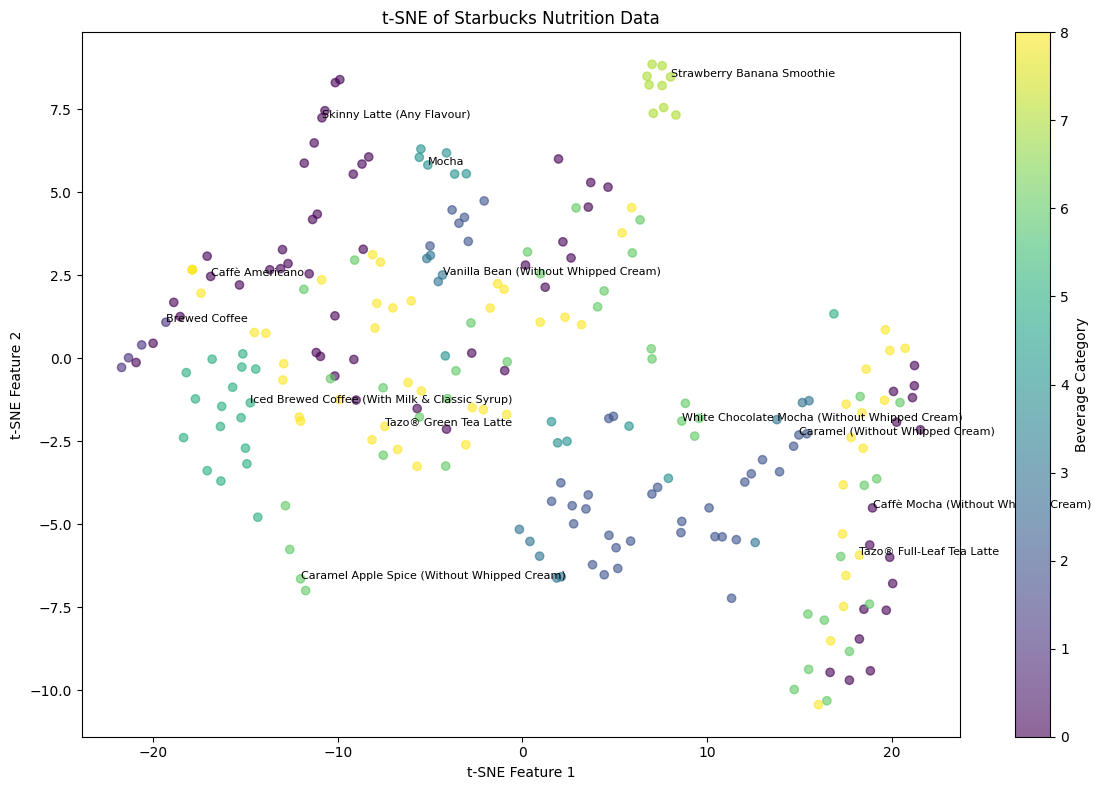

In [76]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
                      c=starbucks_data['Beverage_category'].astype('category').cat.codes,
                      cmap='viridis', alpha=0.6)

plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE of Starbucks Nutrition Data')

cbar = plt.colorbar(scatter)
cbar.set_label('Beverage Category')

for i, txt in enumerate(starbucks_data['Beverage']):
    if i % 20 == 0:
        plt.annotate(txt, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=8)

plt.tight_layout()
plt.show()

In [77]:
print("Beverage Categories:")
for i, category in enumerate(starbucks_data['Beverage_category'].unique()):
    print(f"{i}: {category}")

Beverage Categories:
0: Coffee
1: Classic Espresso Drinks
2: Signature Espresso Drinks
3: Tazo® Tea Drinks
4: Shaken Iced Beverages
5: Smoothies
6: Frappuccino® Blended Coffee
7: Frappuccino® Light Blended Coffee
8: Frappuccino® Blended Crème


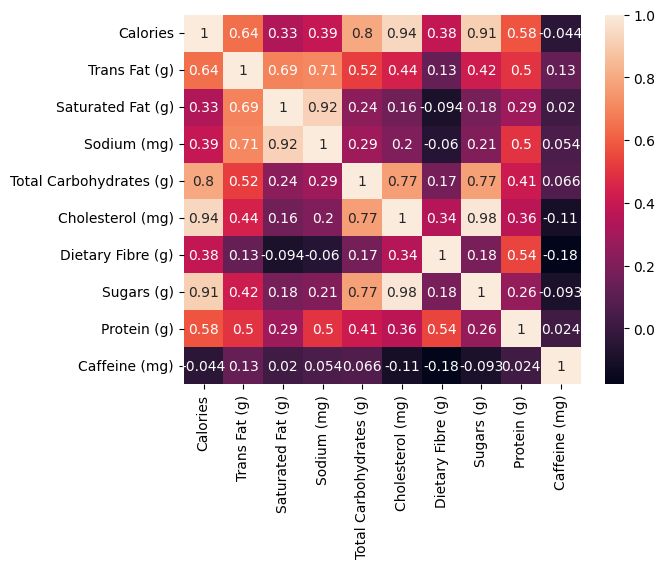

In [ ]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?


**Answer**

In [95]:
numerical_features_1 = ['Calories', 'Total Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)',
                      'Cholesterol (mg)', 'Sodium (mg)', 'Total Carbohydrates (g)',
                      'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Caffeine (mg)']

X = starbucks_data[numerical_features_1]
X = X.apply(pd.to_numeric, errors='coerce')

In [96]:
corr_matrix = X.corr()

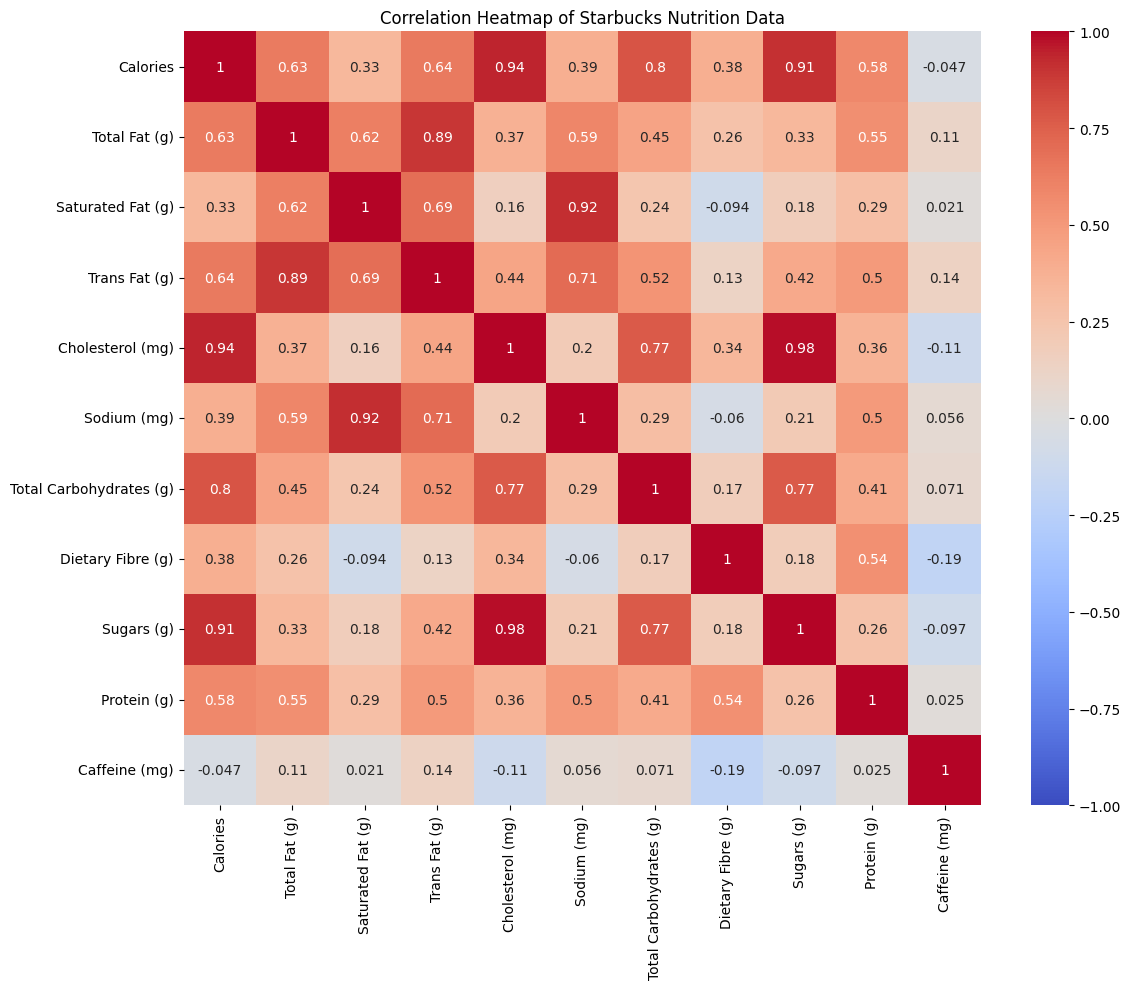

                         Calories  Total Fat (g)  Saturated Fat (g)  \
Calories                 1.000000       0.634276           0.331047   
Total Fat (g)            0.634276       1.000000           0.619856   
Saturated Fat (g)        0.331047       0.619856           1.000000   
Trans Fat (g)            0.642818       0.890992           0.694871   
Cholesterol (mg)         0.940034       0.373834           0.161791   
Sodium (mg)              0.387892       0.588164           0.920077   
Total Carbohydrates (g)  0.795037       0.450980           0.238142   
Dietary Fibre (g)        0.384292       0.259339          -0.093783   
Sugars (g)               0.909675       0.331506           0.179255   
Protein (g)              0.578453       0.550850           0.287532   
Caffeine (mg)           -0.046857       0.112677           0.020987   

                         Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  \
Calories                      0.642818          0.940034     0.387892   
T

In [97]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Starbucks Nutrition Data')
plt.tight_layout()
plt.show()

print(corr_matrix)

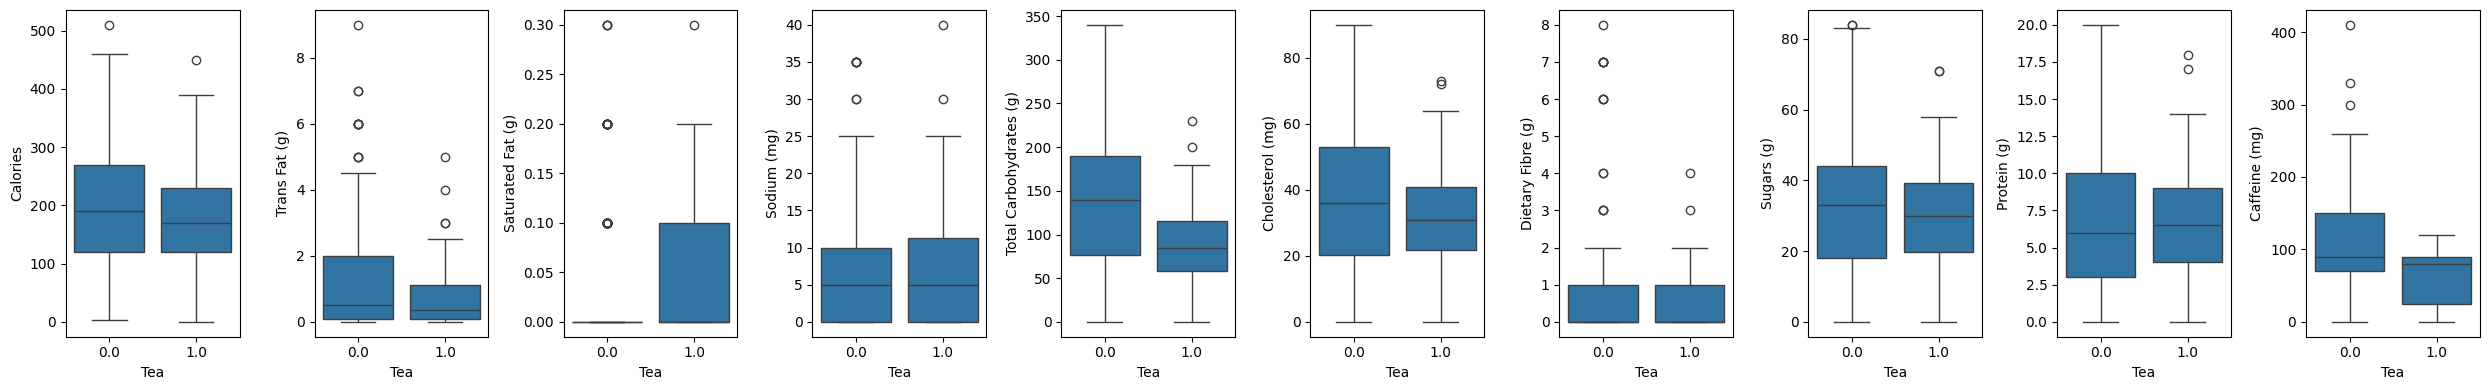

In [ ]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?


**Answer**

In [98]:
starbucks_data['Tea'] = starbucks_data['Beverage_category'].apply(lambda x: 'Tea' if x == 'Tazo® Tea Drinks' else 'Non-Tea')

for col in numerical_features_1:
    starbucks_data[col] = pd.to_numeric(starbucks_data[col], errors='coerce')


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


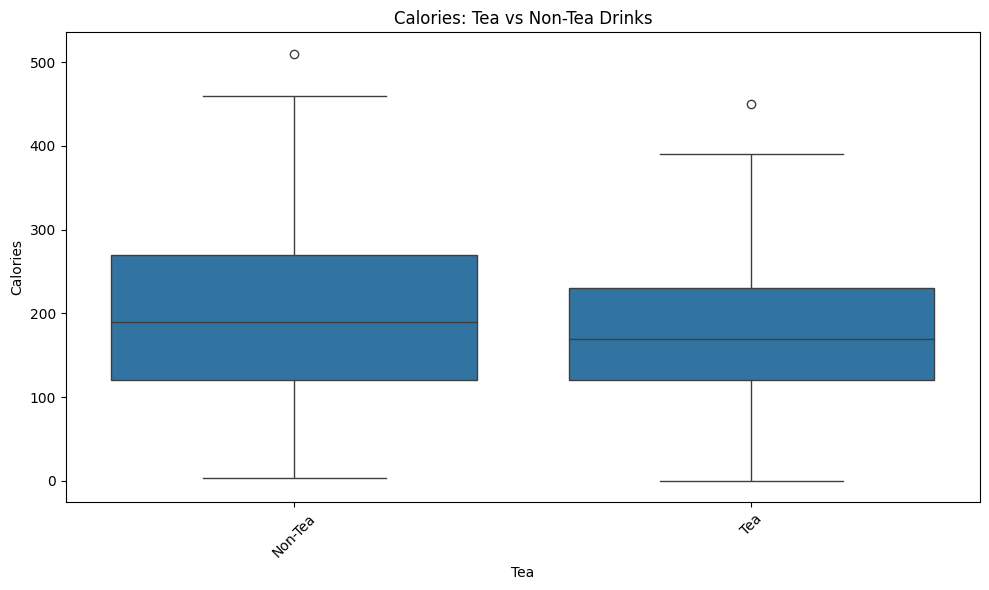

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


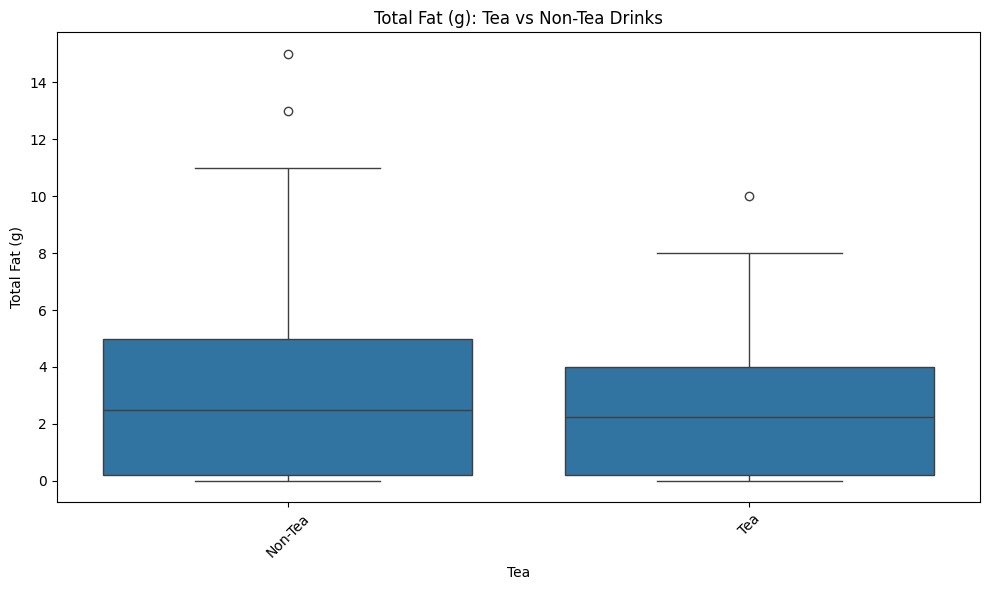

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


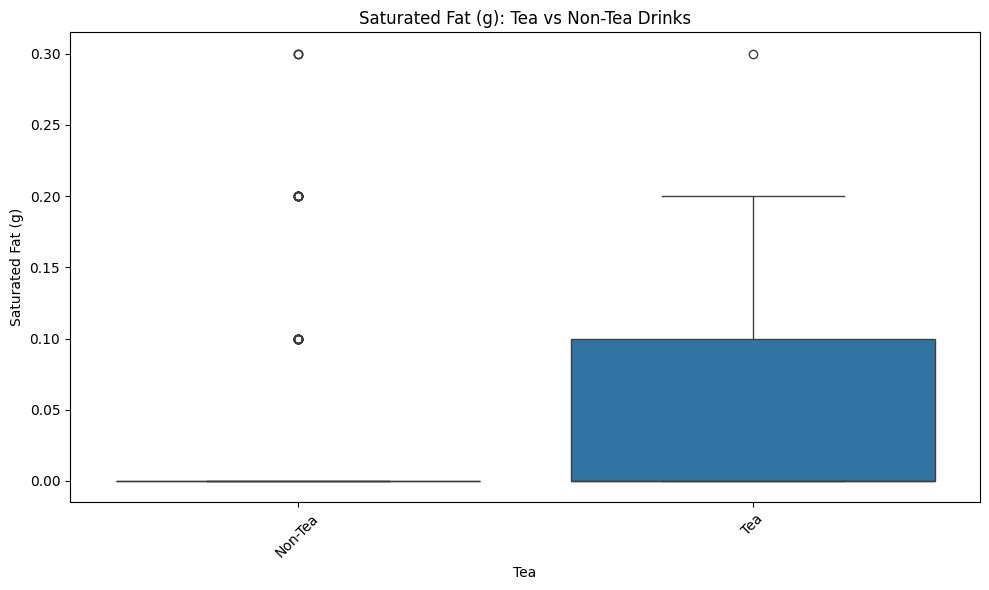

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


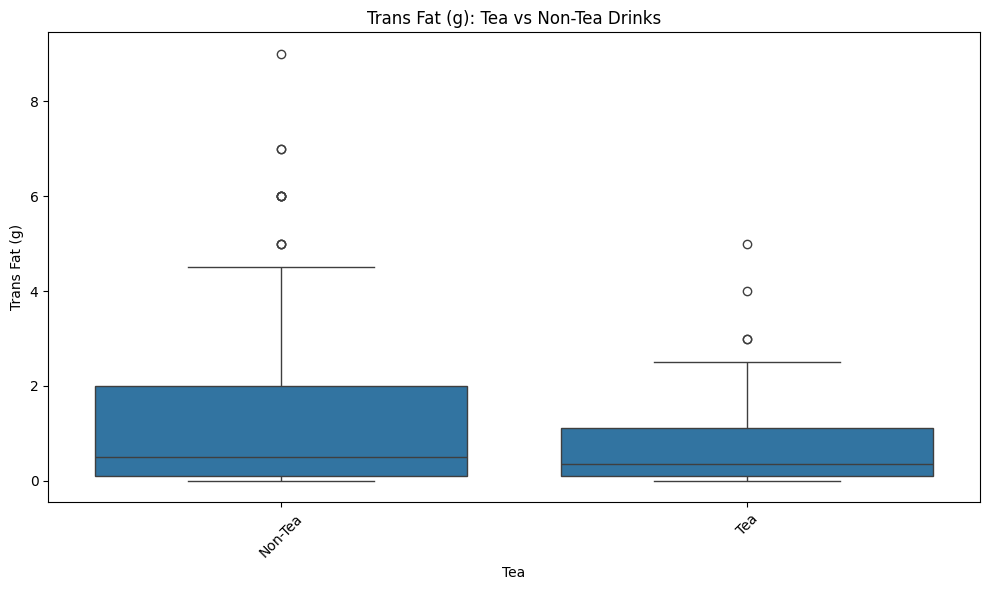

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


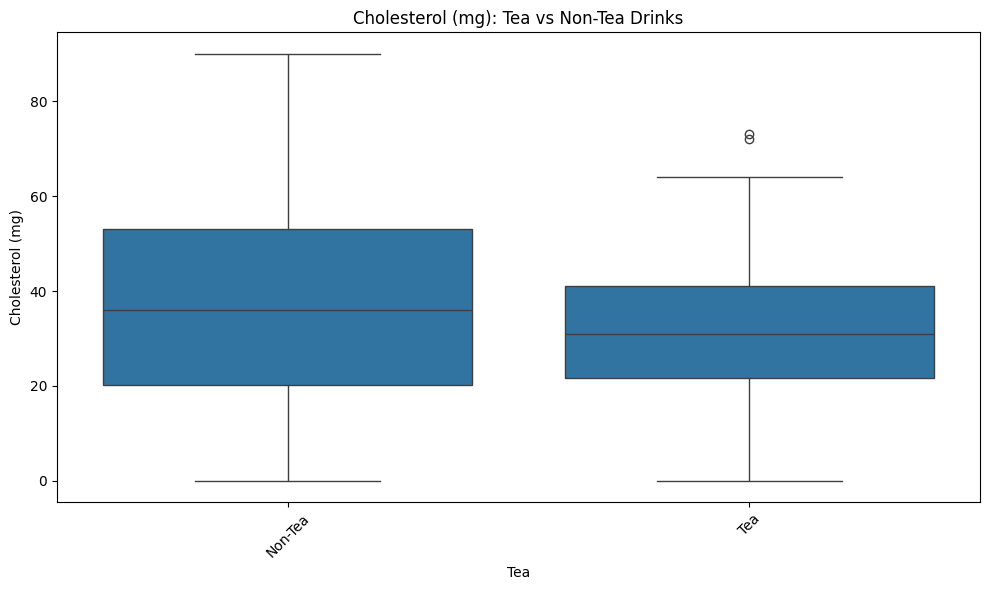

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


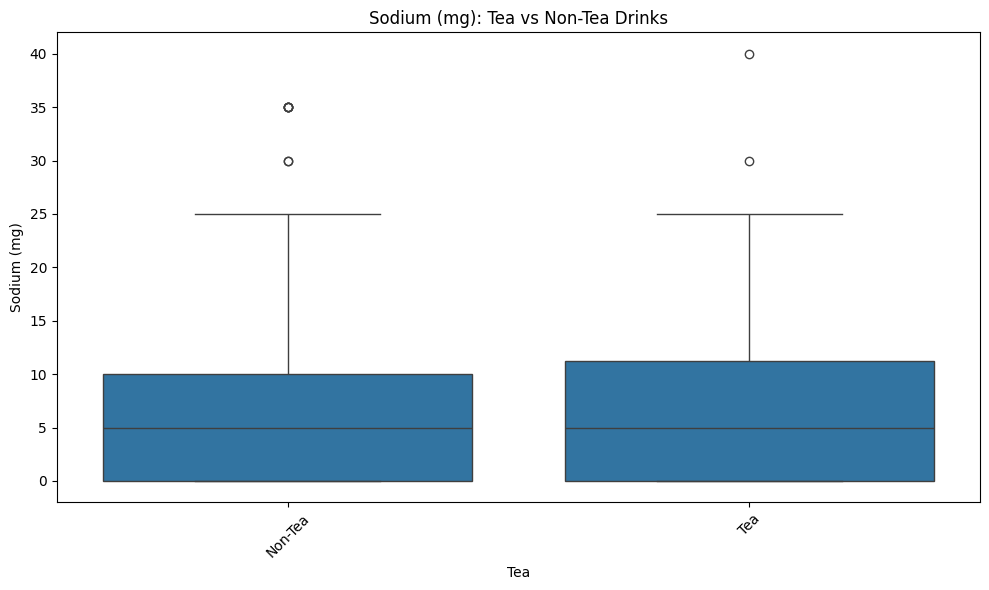

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


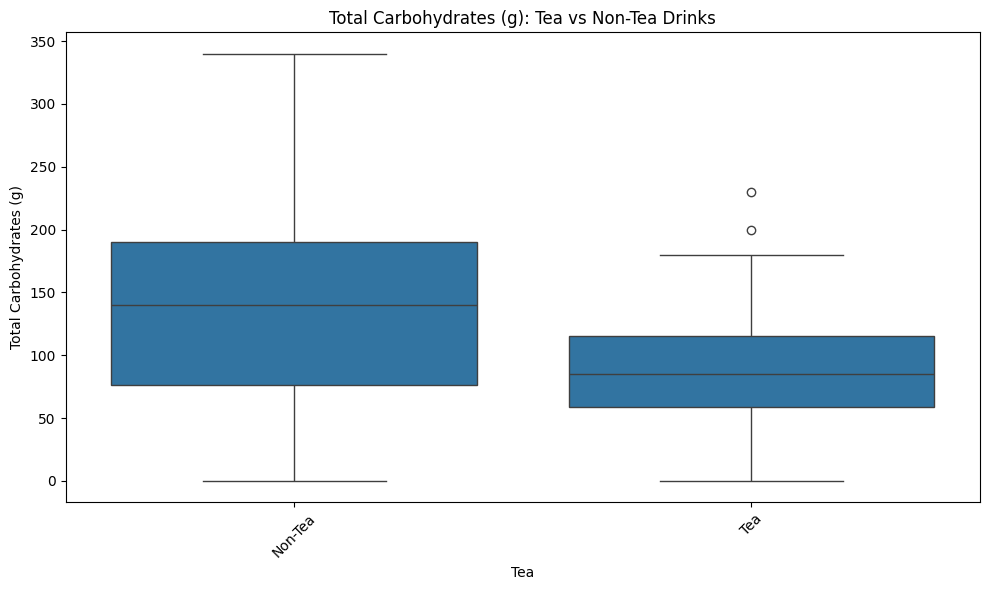

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


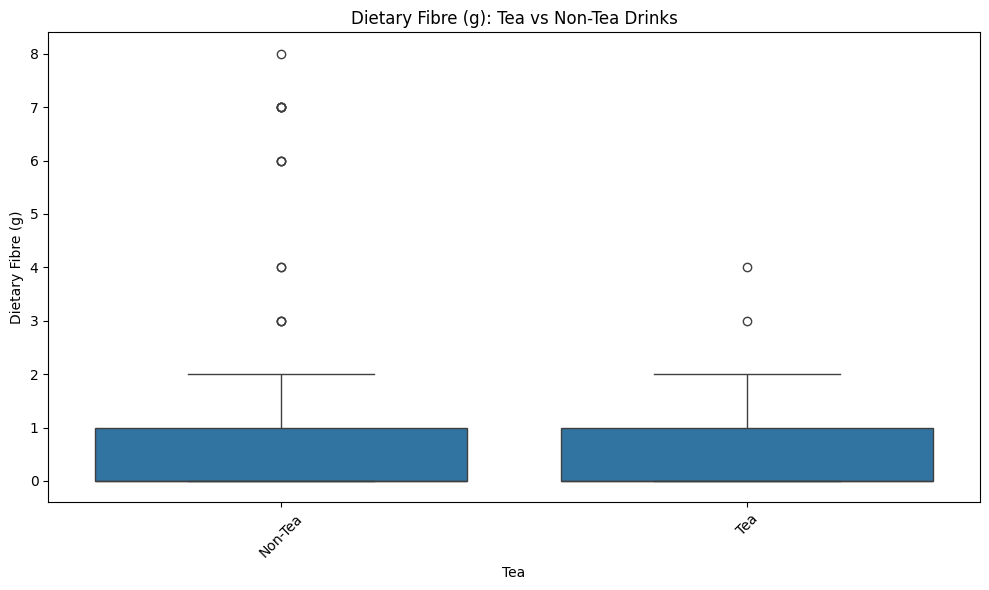

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


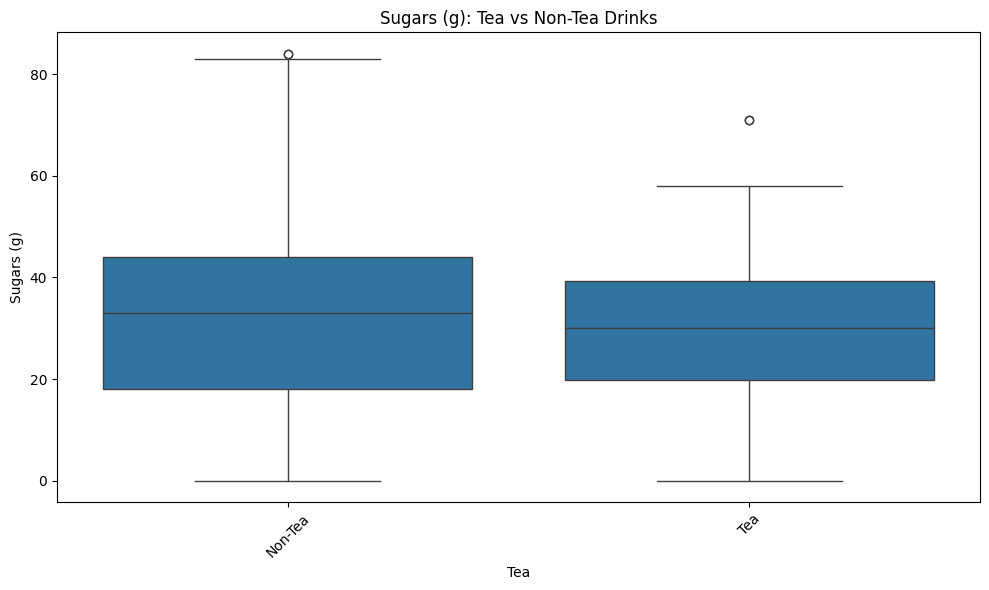

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


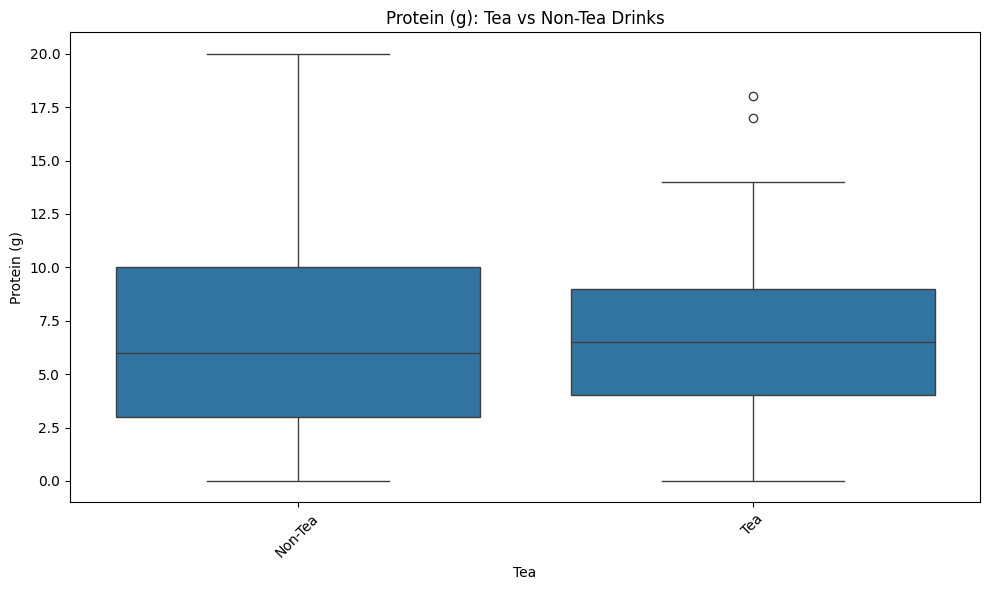

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


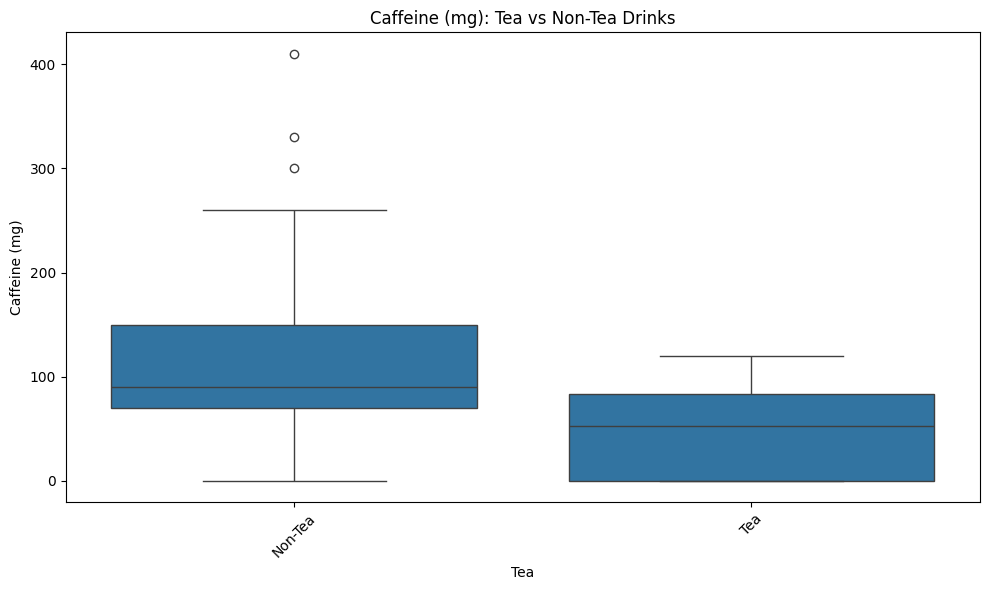

In [99]:
for feature in numerical_features_1:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Tea', y=feature, data=starbucks_data.dropna(subset=[feature, 'Tea']))
    plt.title(f'{feature}: Tea vs Non-Tea Drinks')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [94]:
print("Difference in means (Tea - Non-Tea):")
for feature in numerical_features:
    tea_mean = starbucks_data[starbucks_data['Tea'] == 'Tea'][feature].mean()
    non_tea_mean = starbucks_data[starbucks_data['Tea'] == 'Non-Tea'][feature].mean()
    diff = tea_mean - non_tea_mean
    print(f"{feature}: {diff:.2f}")

Difference in means (Tea - Non-Tea):
Calories: -21.10
Total Fat (g): -0.46
Saturated Fat (g): 0.01
Trans Fat (g): -0.57
Cholesterol (mg): -5.48
Sodium (mg): 1.08
Total Carbohydrates (g): -49.65
Dietary Fibre (g): -0.36
Sugars (g): -3.38
Protein (g): -0.22
Vitamin A (% DV): nan
Vitamin C (% DV): nan
Calcium (% DV): nan
Iron (% DV): nan
Caffeine (mg): -46.80


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.